#Análise de Correspondência

##Introdução

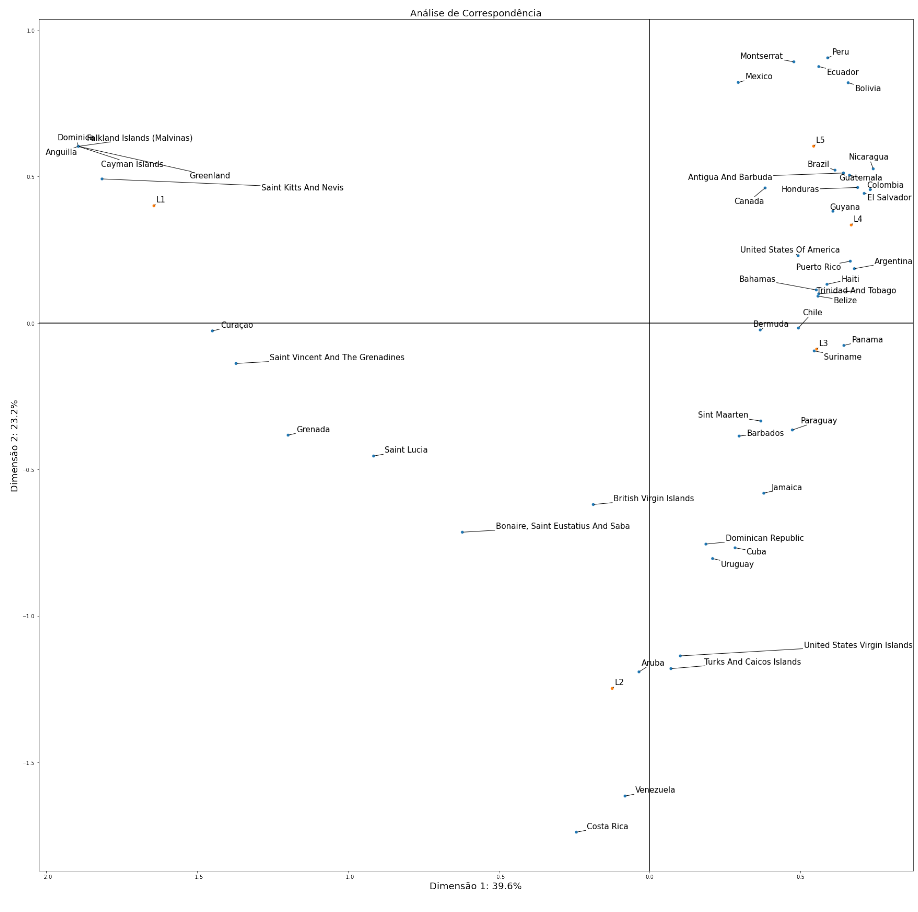

A análise de correspondência simples é baseada em resultados clássicos bastante diretos na teoria de matrizes. O
resultado central é a decomposição de valor singular (SVD), que é a base de
muitos métodos multivariados, como análise de componente principal, 
análise de correlação canônica, todas as formas de biplots lineares e análises discriminantes.

##Instalar e Importar Libs 

In [ ]:
!pip install adjustText

In [ ]:
import pandas as pd #Manipulção de DataFrames
import numpy as np #Manipulações numéricas
import math #Biblioteca matemática
import matplotlib.pyplot as plt #Gráficos
import seaborn as sns #Gráficos


from numpy.linalg import norm #Encontrar o valor da norma matricial ou da norma vectorial
from random import normalvariate #Variações normalizadas
from scipy.stats import chi2_contingency #Criação de Matriz de Contigência
from adjustText import adjust_text #Ajuste de labels gráficas

np.set_printoptions(suppress=True) #Suprimir notação científica

##Leitura da Base de dados

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Dataset_Excel_CSV/covid_america_weekly.csv')
df.head()

,country,week,cumulative_cases,cumulative_deaths,population,std_cum_cases,std_cum_deaths,lethality,lethality_Q5
0,Anguilla,1,3,0,15002.0,0.0002,0.0,0.0,L1
1,Anguilla,2,3,0,15002.0,0.0002,0.0,0.0,L1
2,Anguilla,3,3,0,15002.0,0.0002,0.0,0.0,L1
3,Anguilla,4,3,0,15002.0,0.0002,0.0,0.0,L1
4,Anguilla,5,3,0,15002.0,0.0002,0.0,0.0,L1


##Análise dos dados

Para o exemplo, iremos utilizar 2 variáveis: Países e o grau de Letalidade. Ambas são categóricas (Extremamente importante).

####Verificar todos os países utilizados

In [ ]:
pd.DataFrame({'Países': df['country'].sort_values().unique()}) 

,Países
0,Anguilla
1,Antigua And Barbuda
2,Argentina
3,Aruba
4,Bahamas
5,Barbados
6,Belize
7,Bermuda
8,Bolivia
9,"Bonaire, Saint Eustatius And Saba"


####Verificar os graus de letalidade utilizados

In [ ]:
pd.DataFrame({'Letalidade': df['lethality_Q5'].sort_values().unique()}) 

,Letalidade
0,L1
1,L2
2,L3
3,L4
4,L5


##Criação da tabela de frequências

A tabela de frequências busca apresentar o número de vezes que uma determinada variável assume um determinado valor.

OBS: A tabela de frequências é usada para variáveis categóricas, pois no caso de variáveis contínuas a maior parte dos valores terá frequência 1, assim, não vamos conseguir atingir o objetivo de resumir os dados. Neste caso, que não será abordado no exemplo, a solução seria criar intervalos que conteriam essas variáveis, sendo que esses intervalos seriam variáveis categóricas.

In [ ]:
tab=pd.crosstab(index=df['country'], columns=df['lethality_Q5']).to_numpy()
tab

array([[67,  0,  0,  0,  0],
       [ 2,  0,  9, 42, 15],
       [ 0,  1, 35, 28,  6],
       [ 4, 47,  3, 13,  0],
       [ 2,  1, 49,  1, 16],
       [ 1, 28,  5, 11, 23],
       [ 0, 11, 13, 26, 17],
       [ 2, 17, 14,  2, 33],
       [ 0,  0,  0, 15, 53],
       [23, 32, 10,  1,  0],
       [ 3,  0,  8, 46, 15],
       [11, 35,  1,  1, 19],
       [ 8,  2, 18, 19, 30],
       [68,  0,  0,  0,  0],
       [ 3,  9, 24, 34,  0],
       [ 0,  2,  1, 61,  5],
       [ 4, 66,  0,  0,  0],
       [ 0, 33, 16, 13,  6],
       [50, 17,  0,  0,  0],
       [68,  0,  0,  0,  0],
       [ 3, 33, 23,  7,  6],
       [ 2,  0,  1,  2, 67],
       [ 1,  0,  8, 57,  2],
       [66,  0,  0,  0,  0],
       [68,  0,  0,  0,  0],
       [41, 27,  0,  0,  0],
       [ 2,  0,  6, 52,  9],
       [ 2,  0, 25, 24, 18],
       [ 2,  1, 40, 19,  6],
       [ 1,  0, 11, 47, 10],
       [ 1, 20, 44,  2,  2],
       [10,  1,  1,  0, 66],
       [ 4,  0,  0,  0, 64],
       [ 0,  0,  4, 54, 10],
       [ 0,  1

##Calcular Qui²

Antes de iniciar qualquer análise, devemos verificar se as relações entre as nossas variáveis se dá ou não de forma aleatória.

O objetivo de se analisar a distribuição conjunta de duas variáveis qualitativas, é descrever a
associação entre elas. Esperamos que haja uma certa dependência entre as variáveis.

Ao fazer isso estamos realizando um Teste de Hipóteses:

H0 (Hipótese Nula): Aleatoriedade de associação (Não há associação).
H1 (Hipótese Alternativa): Existência de associação.

Buscamos refutar a hipótese nula. Para isso usaremos o Teste de Independência (Qui²):

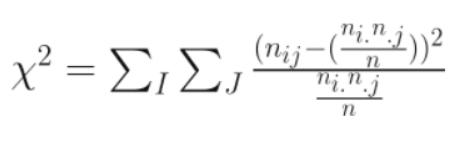

Onde:

n: total de frequências
nij: frequência na linha e coluna
ni: frequência na linha
nj: frequência na coluna

O produto de ni e nj normalizado por n é a frequência esperada para nij no objetivo de independência. Quanto maior o Qui² maior é a certeza de independência.

In [ ]:
soma_total = np.sum(tab)

matriz_correspondencia = np.divide(tab,soma_total)

total_linha = np.sum(matriz_correspondencia, axis=1)

total_colunas = np.sum(matriz_correspondencia, axis=0)

Cálcular o produto dos vetores das linhas e colunas

In [ ]:
modelo_independencia = np.outer(total_linha, total_colunas)
modelo_independencia

array([[0.00396567, 0.00397154, 0.00396567, 0.00397154, 0.00396567],
       [0.00402486, 0.00403082, 0.00402486, 0.00403082, 0.00402486],
       [0.00414324, 0.00414937, 0.00414324, 0.00414937, 0.00414324],
       [0.00396567, 0.00397154, 0.00396567, 0.00397154, 0.00396567],
       [0.00408405, 0.0040901 , 0.00408405, 0.0040901 , 0.00408405],
       [0.00402486, 0.00403082, 0.00402486, 0.00403082, 0.00402486],
       [0.00396567, 0.00397154, 0.00396567, 0.00397154, 0.00396567],
       [0.00402486, 0.00403082, 0.00402486, 0.00403082, 0.00402486],
       [0.00402486, 0.00403082, 0.00402486, 0.00403082, 0.00402486],
       [0.00390648, 0.00391227, 0.00390648, 0.00391227, 0.00390648],
       [0.00426161, 0.00426793, 0.00426161, 0.00426793, 0.00426161],
       [0.00396567, 0.00397154, 0.00396567, 0.00397154, 0.00396567],
       [0.00455756, 0.00456431, 0.00455756, 0.00456431, 0.00455756],
       [0.00402486, 0.00403082, 0.00402486, 0.00403082, 0.00402486],
       [0.00414324, 0.00414937, 0.

Cálculo Manual do Qui²

In [ ]:
qui2 = soma_total*np.sum(np.square(matriz_correspondencia - modelo_independencia) / modelo_independencia)
print('Qui²: ',qui2)

Qui²:  6419.643087147196


Comparação com o teste qui² do scipy

In [ ]:
qui2, p_value, _ , _ = chi2_contingency(tab)
print('Qui²: ',qui2)
print('p-value: {:.20f}'.format(p_value))

Qui²:  6419.643087147197
p-value: 0.00000000000000000000


As diferenças são medidas por Qui² - distâncias (distâncias euclidianas ponderadas entre linhas normalizadas). 

Elas são calculados dividindo as entradas das linhas por seus respectivos totais das linhas. Os pesos são inversamente proporcionais às raízes quadradas dos totais das colunas.

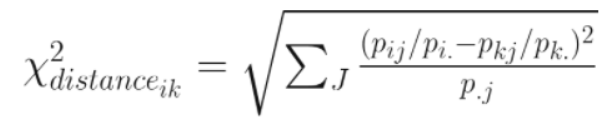

In [ ]:
#Normalizar matriz de Correspondência
matriz_correspondencia_norm = np.divide(matriz_correspondencia,total_linha[:, None])

In [ ]:
#Criar matriz de tamanho igual à nossa de correspondência
distancias_qui2 = np.zeros((matriz_correspondencia.shape[0], matriz_correspondencia.shape[0]))

total_colunas_norm = np.sum(matriz_correspondencia_norm, axis=0)

for linha in range(matriz_correspondencia.shape[0]):
    distancias_qui2[linha]=np.sqrt(np.sum(np.square(matriz_correspondencia_norm - matriz_correspondencia_norm[linha])/total_colunas, axis=1))

Agora vamos salvar tudo num Dataframe e verificar as distâncias geradas.

In [ ]:
df_distancias_qui2 = pd.DataFrame(data=np.round(distancias_qui2 * 100).astype(int))
df_distancias_qui2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48
0,0,264,266,266,274,254,253,253,288,185,263,229,231,0,254,299,298,258,80,0,250,301,291,0,0,126,277,251,262,272,271,272,298,288,296,263,312,267,14,146,94,254,279,265,281,247,276,257,296
1,264,0,100,191,187,140,65,156,156,193,8,183,96,264,80,74,258,149,226,264,163,208,65,264,264,216,38,80,130,23,190,200,214,46,201,156,222,134,256,200,222,128,192,163,209,120,205,142,240
2,266,100,0,191,104,152,85,148,195,176,106,188,99,266,52,153,253,129,227,266,127,233,131,266,266,215,122,52,34,100,109,223,239,133,102,78,247,50,258,187,223,136,101,91,209,45,194,137,235
3,266,191,191,0,224,101,144,157,235,93,192,88,180,266,158,216,70,69,189,266,87,263,214,266,266,146,203,185,198,196,166,248,266,209,238,157,274,203,252,128,175,104,217,202,57,190,61,57,52
4,274,187,104,224,0,173,147,137,206,186,194,195,125,274,146,252,267,158,238,274,138,221,231,274,274,227,217,108,73,194,78,209,225,228,67,73,232,56,266,195,234,161,28,31,221,68,201,185,252
5,254,140,152,101,173,0,82,64,137,114,144,56,98,254,137,193,147,69,188,254,81,165,190,254,254,157,168,121,158,156,149,152,168,174,210,127,176,151,241,136,178,17,178,143,83,138,79,87,130
6,253,65,85,144,147,82,0,98,136,147,71,128,59,253,70,128,208,92,202,253,104,180,120,253,253,183,97,54,104,79,140,169,186,105,172,106,194,102,243,161,195,67,152,119,153,88,145,98,189
7,253,156,148,157,137,64,98,0,107,141,161,92,75,253,154,222,195,110,199,253,106,122,216,253,253,177,191,109,145,174,141,108,125,198,190,120,134,128,243,155,191,63,150,108,132,119,121,138,181
8,288,156,195,235,206,137,136,107,0,227,161,171,105,288,202,217,278,196,253,288,202,55,219,288,288,243,189,144,204,179,234,59,63,191,260,206,68,185,280,231,249,136,226,179,213,176,211,212,264
9,185,193,176,93,186,114,147,141,227,0,195,82,155,185,155,235,126,91,108,185,83,247,226,185,185,69,212,167,172,201,139,224,248,223,206,135,259,177,171,39,96,115,181,168,109,160,99,97,120


##SVD (Decomposição Singular de Vetores)

####Resumo

Qualquer vetor de força pode ser decomposto em seus componentes ao longo dos eixos x e y conforme imagem abaixo:

<img alt="" class="qv wg et fh fd ke v c" width="338" height="312" role="presentation" src="https://miro.medium.com/max/423/1*AP19J0U3bJUy8zbodGS_4g.gif" srcset="https://miro.medium.com/max/345/1*AP19J0U3bJUy8zbodGS_4g.gif 276w, https://miro.medium.com/max/423/1*AP19J0U3bJUy8zbodGS_4g.gif 338w" sizes="338px">

Parabéns, Agora você sabe o que é singular decomposição de valor. De forma resumida, o svd nada mais é do que decomposição de vetores em eixos ortogonais (que intercepta em ângulos retos).

####Detalhamento

Como vimos, a decomposição de valores singulares, é um método de decomposição de matriz para reduzir uma matriz às suas partes constituintes, a fim de tornar mais simples alguns cálculos de matriz subsequentes.

A = U . Sigma . V^T

Onde A é a matriz real **coluna x linha** que desejamos decompor, U é uma matriz **coluna x coluna**, Sigma (frequentemente representado pela letra grega maiúscula Sigma) é uma matriz diagonal **coluna x linha** e V^T é a transposta de uma matriz **linha x linha** onde T é um sobrescrito.

Os valores diagonais na matriz Sigma são conhecidos como os valores singulares da matriz original A. As colunas da matriz U são chamadas de vetores singulares à esquerda de A, e as colunas de V são chamadas de vetores singulares à direita de A.

O SVD é amplamente usado no cálculo de outras operações de matriz, como matriz inversa, mas também como um método de redução de dados em aprendizado de máquina.
 



####Como calcular?

Especificamente, o SVD decompõe qualquer matriz A em uma matriz ortogonal U, uma matriz diagonal Σ, e outra matriz ortogonal V^T.

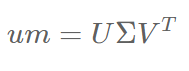

U consiste dos autovetores de AA^T, enquanto V é uma matriz de autovetores de A^TA. Os valores singulares values em Σ são a raiz quadrada dos autovalores de AA^T.

Lembre-se que a decomposição espectral só pode ser realizada em matrizes quadradas. Multiplicando A por sua transposição, você tem uma matriz que tem o mesmo número de linhas e de colunas. U também é conhecida como uma matriz de vetores singulares de esquerda, Σ como valores singulares, e V^T
como os vetores singulares de direita. Ufa... isso é muito para digerir.

####Analogia

Imagine que você tenha uma mercearia que vende diferentes produtos, e você capturou todos os seus produtos como colunas em uma matriz e todos os clientes como linhas. Cada linha indica quantos itens de um determinado produto um cliente comprou. Assumimos que comprar quantidades maiores de um determinado produto indica uma preferência maior.

Você pode pensar em U como representando a similaridade de vários produtos a certos conceitos.

V^T encapsula um conceito como um "amante do vinho" ou um amante do queijo, enquanto Sigma (s) representa a força desse conceito.

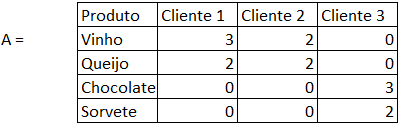

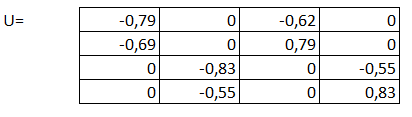

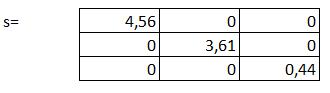

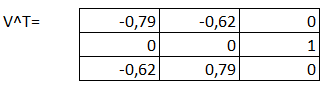

Neste caso, temos um cliente que gosta muito de vinho e queijo, vou chamar esse comportamento de "harmonização Portuguesa" ([Veja o porque no link](https://www.wine.com.br/winepedia/harmonizacao-de-a-a-w/queijos-e-vinhos/)), mas que não gosta de doces e um amante doce que não gosta de vinho e queijo. As duas primeiras entradas de coluna em U indicam que o vinho tem uma alta semelhança com o conceito de "harmonização portuguesa". Sigma nos mostra que este parece ser um conceito forte, e V^T indica que os Clientes 1 e 2 associam-se fortemente a esse conceito.

####Implementação Manual

Como esse tutorial é baseado em sua maioria em conceitos manuais, deixei uma implementação do svd para que você possa se aprofundar mais a fundo nos conceitos depurando o código. Ele é altamente baseado na biblioteca **np.linalg.svd** do Numpy. Usaremos ele mais à frente.

In [ ]:
def vetorDeUnidadeAleatorio(vetor):
    nao_normalizado= [normalvariate(0, 1) for _ in range(vetor)]
    normalizacao = math.sqrt(sum(x * x for x in nao_normalizado))
    return [x / normalizacao for x in nao_normalizado]


def svd_1d(A, epsilon=1e-10):
    '''SVD unidimensional'''

    linhas, colunas = A.shape
    x = vetorDeUnidadeAleatorio(min(linhas,colunas))
    ultimoV = None
    atualV = x

    if linhas > colunas:
        B = np.dot(A.T, A)
    else:
        B = np.dot(A, A.T)

    iteracoes= 0
    while True:
        iteracoes += 1
        ultimoV = atualV
        atualV = np.dot(B, ultimoV)
        atualV = atualV / norm(atualV)

        if abs(np.dot(atualV, ultimoV)) > 1 - epsilon:
            return atualV


def svd(A, k=None, epsilon=1e-10):
    '''
        Calcula a decomposição de valor singular de uma matriz A
        usando o método de potência. A é a matriz de entrada e k
        é o número de valores singulares que você deseja calcular.
        Se k não tiver valores, isso calcula a decomposição completa.
    '''
    A = np.array(A, dtype=float)
    linhas, colunas = A.shape
    svds = []
    if k is None:
        k = min(linhas, colunas)

    for i in range(k):
        matriz_1d = A.copy()

        for u, valor_singular, v in svds[:i]:
            matriz_1d -= valor_singular * np.outer(u, v)

        if linhas > colunas:
            v = svd_1d(matriz_1d, epsilon=epsilon) #próximo vetor singular
            u_nao_normalizado = np.dot(A, v)
            sigma = norm(u_nao_normalizado)  #próximo vetor singular
            u = u_nao_normalizado / sigma
        else:
            u = svd_1d(matriz_1d, epsilon=epsilon)  #próximo vetor singular
            vetor_nao_normalizado = np.dot(A.T, u)
            sigma = norm(vetor_nao_normalizado)  #próximo vetor singular
            v = vetor_nao_normalizado / sigma

        svds.append((u,sigma, v))

    us,valores_singulares, vs = [np.array(x) for x in zip(*svds)]
    return us.T, valores_singulares,vs

OBS: Como estamos utilizando um algoritmo que gera números aleatórios, as vezes a saída poderá ser diferente da implementada pelo numpy (np.linalg.svd). O sinal poderá alternar entre + e -.

##Scores

A análise de Correspondência Simples fornece uma forma de representar uma tabela de distâncias Qui² em formato gráfico (similar à uma PCA). 

Para calcular essa representação, precisamos transformar as distâncias em pontos em um sistema de coordenadas cartesianas. Isso é obtido por uma decomposição de valor singular (SVD) de uma matriz de resíduos padronizados

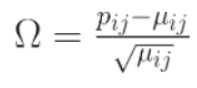

In [ ]:
residuos_padronizados = np.divide((matriz_correspondencia-modelo_independencia),np.sqrt(modelo_independencia))
u,s,vh = svd(residuos_padronizados)

#Caso queiram Comparar basta utilizar o comando ao lado -> u,s,vh = np.linalg.svd(residuos_padronizados, full_matrices=False)

Estamos atrás das coordenadas das linhas. Esses pontos são organizados de forma que a distância euclidiana entre dois pontos seja igual à distância Qui² entre as duas linhas às quais eles correspondem. As pontuações das linhas são definidas como:

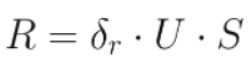

onde U e S são a matriz de vetores singulares à esquerda e os valores singulares na matriz diagonal de SVD. Quando ao deltaR é a matriz diagonal feita dos recíprocos das raízes quadradas dos totais da linha.

OBS: No caso do vh para o cálculo dos scores das colunas deveremos fazer a transposição da matriz.

In [ ]:
def Calculo_Scores(total_linha_coluna,u_vhT,s):
  delta_R=np.diag(np.divide(1.0, np.sqrt(total_linha_coluna)))
  return np.dot(np.dot(delta_R, u_vhT), np.diag(s))

In [ ]:
scores_linhas = Calculo_Scores(total_linha, u, s)

In [ ]:
scores_colunas = Calculo_Scores(total_colunas, vh.T, s)

##Variância Explicada

Vamos verificar quanto da variância cada componente está capturando

In [ ]:
variancia_explicada = np.round(s**2/np.sum(s**2), decimals=3) * 100
variancia_explicada

array([39.6, 23.2, 21.5, 15.7,  0. ])

Veja que com 4 dimensões explicamos praticamente todos os nossos dados e a quinta está muita próxima de 0. Vamos então considerar somente as 4 primeiras para plotagem da variância capturada.

In [ ]:
variancia_dimensional=variancia_explicada[0:4]
print(f'Variâncias Dimensionais: {variancia_dimensional}')
print(f'Variância capturada: {round(sum(variancia_dimensional),2)}%')

Variâncias Dimensionais: [39.6 23.2 21.5 15.7]
Variância capturada: 100.0%


Com 2 componentes podemos explicar em média 62.8% da variância de todos os nossos dados. Vamos visualizar isso de forma gráfica:

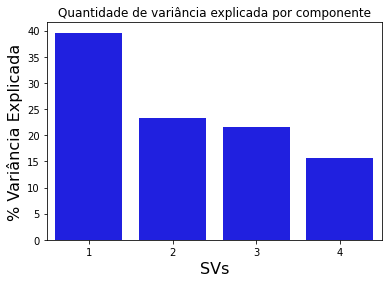

In [ ]:
sns.barplot(x=list(range(1,len(variancia_dimensional)+1)), y=variancia_dimensional, color="blue")
plt.title("Quantidade de variância explicada por componente")
plt.xlabel('SVs', fontsize=16)
plt.ylabel('% Variância Explicada', fontsize=16)
plt.show();

Vamos separar esses 2 componentes dos demais criando um dataframe.

In [ ]:
def Row_Column_Scores(n_componentes=2):
  #Scores das linhas
  df_linha = pd.DataFrame(data=[l[0:n_componentes] for l in scores_linhas], columns=[f'dim{i}' for i in range(1,n_componentes+1)],index=df['country'].sort_values().unique())
  df_linha['variavel']='linha'

  #Scores das colunas
  df_coluna=pd.DataFrame(data=[l[0:n_componentes] for l in scores_colunas], columns=[f'dim{i}' for i in range(1,n_componentes+1)],index=df['lethality_Q5'].sort_values().unique())
  df_coluna['variavel']='coluna'

  #Juntar tudo
  df_final=pd.concat([df_linha,df_coluna])

  return df_final

In [ ]:
df_final_dois_componentes =Row_Column_Scores()

In [ ]:
df_final_dois_componentes

,dim1,dim2,variavel
Anguilla,-1.894034,0.602967,linha
Antigua And Barbuda,0.643029,0.511945,linha
Argentina,0.679111,0.185432,linha
Aruba,-0.035105,-1.190976,linha
Bahamas,0.552884,0.112795,linha
Barbados,0.297002,-0.385940,linha
Belize,0.558527,0.091646,linha
Bermuda,0.366923,-0.023767,linha
Bolivia,0.658593,0.820111,linha
"Bonaire, Saint Eustatius And Saba",-0.620855,-0.714133,linha


##Visualização dos resultados

Vamos visualizar gráficamente nossos resultados.

500

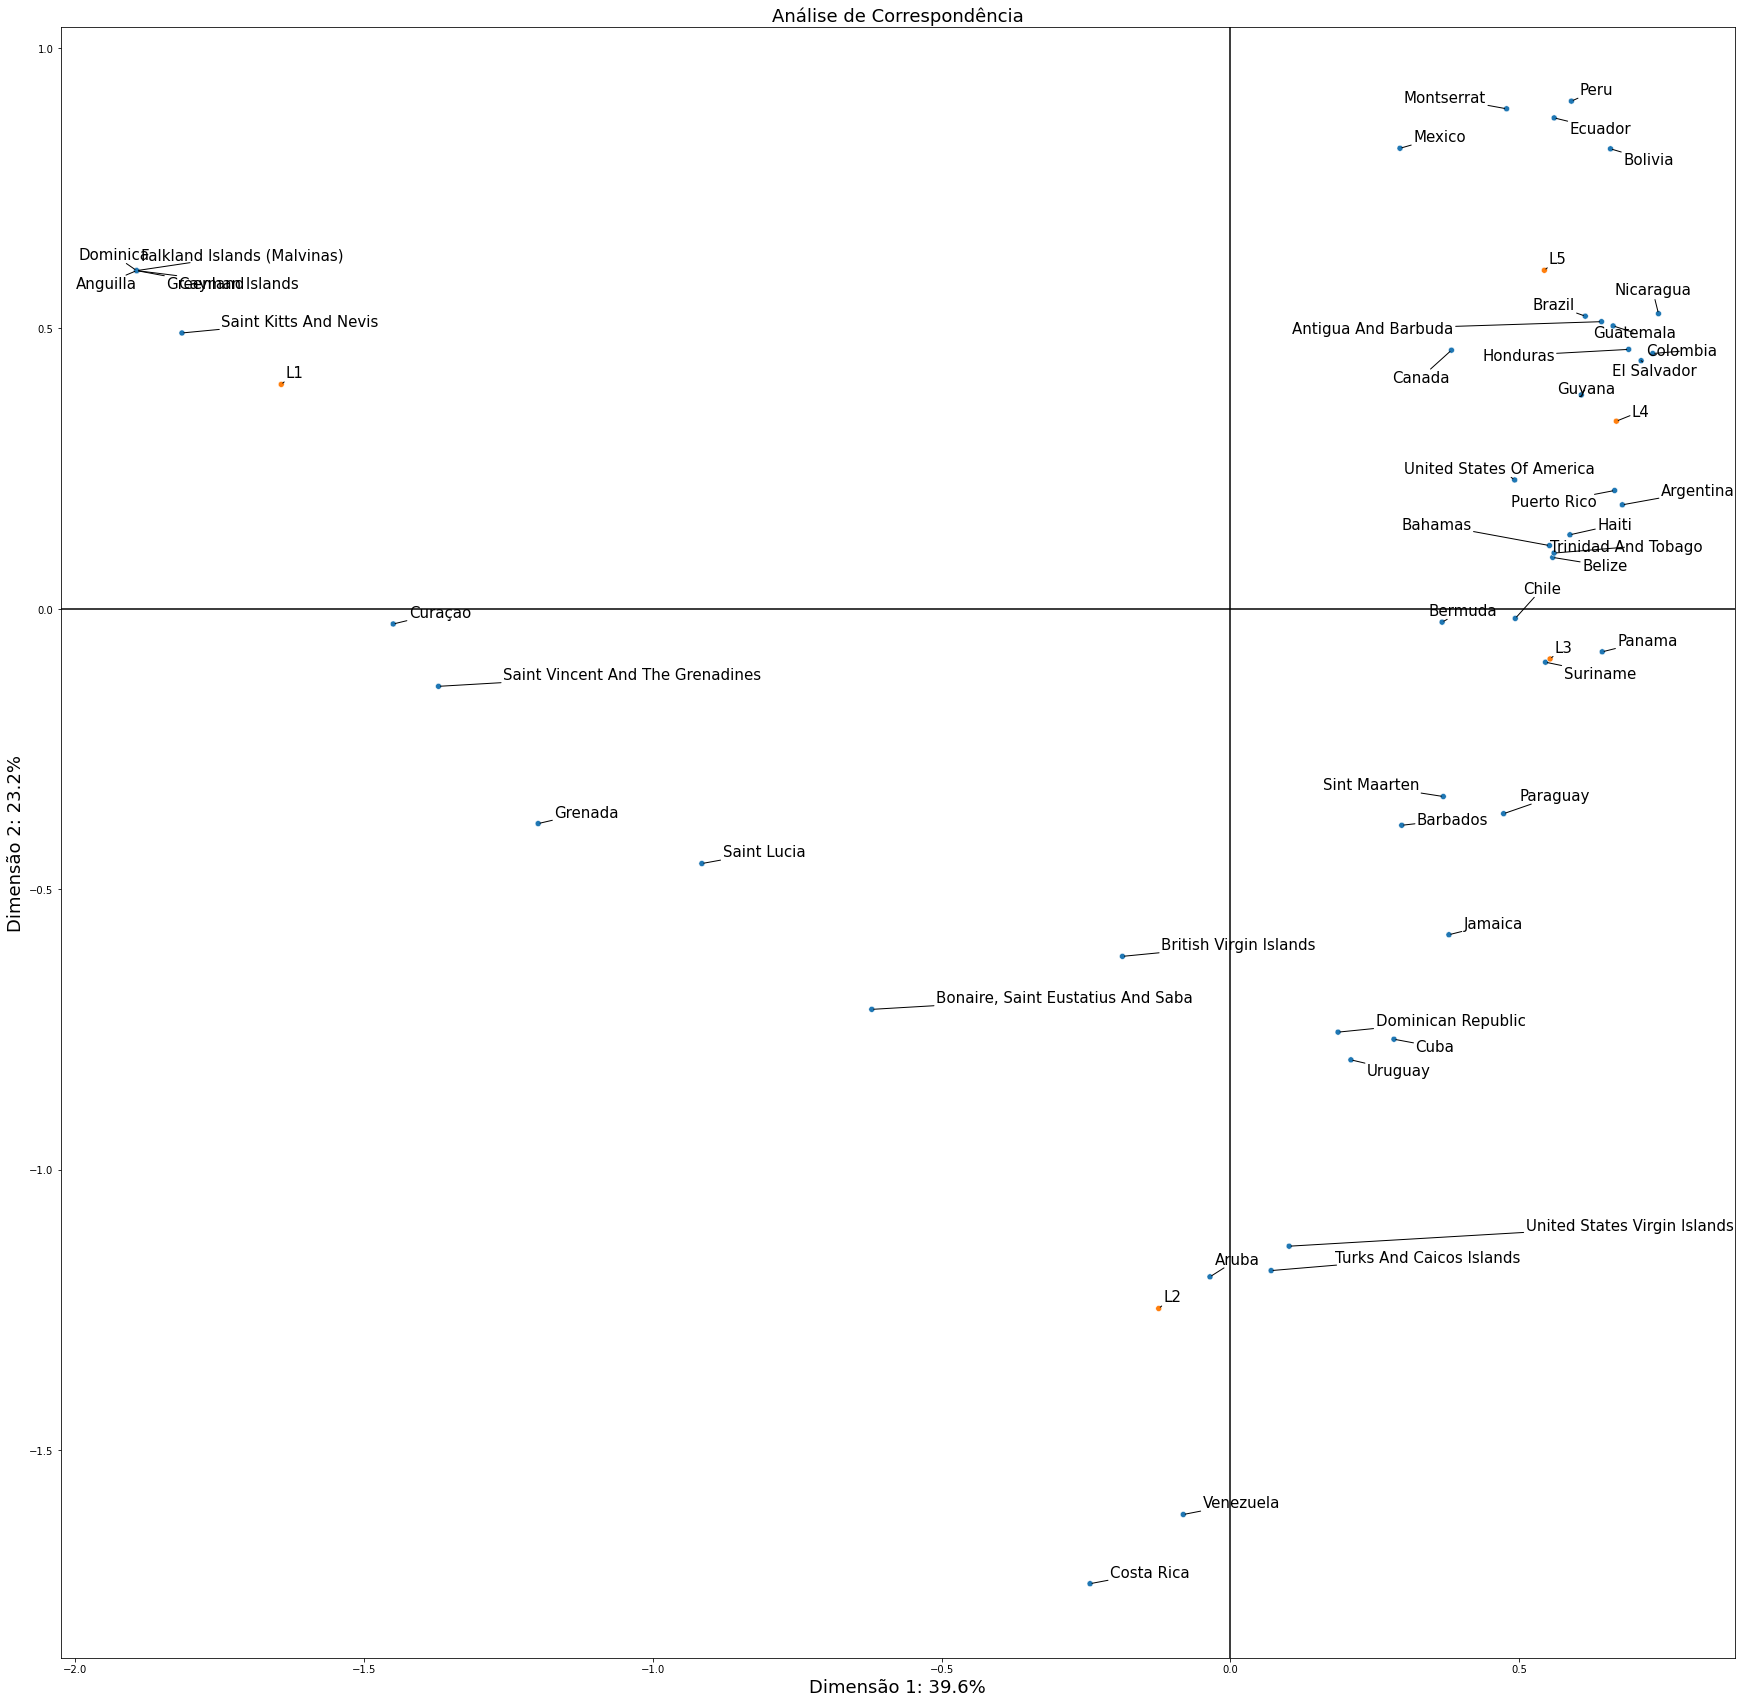

In [ ]:
fig=plt.figure(figsize=(30,30))
ax = sns.scatterplot(data=df_final_dois_componentes,x='dim1', y='dim2', hue='variavel')
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.get_legend().set_visible(False)
plt.title("Análise de Correspondência",fontsize=18)
plt.xlabel(f"Dimensão 1: {round(variancia_explicada[0],2)}%",fontsize=18)
plt.ylabel(f"Dimensão 2: {round(variancia_explicada[1],2)}%",fontsize=18)

texts=[]

for rotulo in df_final_dois_componentes.index:
    texts.append(plt.annotate(rotulo, 
                 (df_final_dois_componentes.loc[rotulo,:]['dim1'],
                  df_final_dois_componentes.loc[rotulo,:]['dim2']),
                 horizontalalignment='center', verticalalignment='center',size=15))
    
adjust_text(texts, force_points=0.2, force_text=0.2,
            expand_points=(1.5, 1.5), expand_text=(1.5, 1.5),
            arrowprops=dict(arrowstyle="-", color='black', lw=1))